## KNN数字识别
### 0.导入所需的第三方库

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from os import listdir
from sklearn.neighbors import KNeighborsClassifier as KNN
import os

### 1.清理运行环境

In [ ]:
os.system('rm -r  /home/aistudio/test')
os.system('rm -r  /home/aistudio/train')

### 2.解压数据集
> 数据集所在路径 data/data23037/data.zip

In [ ]:
a = os.system('unzip -o -d /home/aistudio /home/aistudio/data/data23037/data.zip')
if a == 0:
    print('数据集解压完成')
else:
    print('数据集解压失败')

### 3.数据预处理  函数说明:将32x32的图像转换为1x1024的特征向量

In [6]:

def img2vector(filename):
    #打开图片,转成单通道灰度图
    img = Image.open(filename).convert('L')
    #图像转换为数组
    arr = np.asarray(img, dtype="uint8")
    #转换为1x1024向量
    returnVect = arr.reshape((1,1024))
    #返回转换后的1x1024向量
    return returnVect

### 4.构建KNN模型 

In [ ]:
def handwritingClassTrain(k):
    print('----------程序开始----------')
    #训练集的Labels
    hwLabels = []
    #返回trainingDigits目录下的文件名
    trainingFileList = listdir('train')
    #返回文件夹下文件的个数
    m = len(trainingFileList)
    #初始化训练的Mat矩阵,训练集
    trainingMat = np.zeros((m, 1024))
    print('训练数据导入中...')
    #从文件名中解析出训练集的类别
    for i in range(m):
        #获得文件的名字
        fileNameStr = trainingFileList[i]
        #获得分类的数字
        classNumber = int(fileNameStr.split('_')[0])
        #将获得的类别添加到hwLabels中
        hwLabels.append(classNumber)
        #将每一个文件的1x1024数据存储到trainingMat矩阵中
        trainingMat[i,:] = img2vector('train/%s' % (fileNameStr))
    print('构建KNN分类器，训练进行中...')
    #构建kNN分类器
    neigh =KNN(n_neighbors = k, algorithm = 'auto')
    #拟合模型, trainingMat为训练矩阵,hwLabels为对应的标签
    neigh.fit(trainingMat, hwLabels)
    print('训练结束，计算KNN模型评分中...')
    #计算模型评分
    res = neigh.score(trainingMat, hwLabels)
    print('KNN模型最终评分为：{}'.format(res))
    print('----------程序结束----------')
    #返回KNN模型
    return neigh

### 5.运行函数，训练结束后，保存KNN模型

k = 3  #设定k值
KNN = handwritingClassTrain(k)

### 6.利用模型，进行预测

def testOne(fileName):
    #打开图片
    img = Image.open(fileName)
    #显示图像
    plt.imshow(img)
    plt.show()
    #获得分类的数字
    classNumber = int(fileName.split('_')[0].split('/')[1])
    #获得测试集的1x1024向量,用于训练
    vectorUnderTest = img2vector(fileName)
    #获得预测结果
    classifierResult = KNN.predict(vectorUnderTest)
    #判断预测是否正确
    if classifierResult == classNumber:
        res = '正确'
    else:
        res = '错误'
    print("分类返回结果为%d\t真实结果为%d\t预测%s" %(classifierResult, classNumber, res))

# 7.调用函数，预测单张图片


In [ ]:
fileName = 'test/0_50.jpg' #待预测图片路径
testOne(fileName)



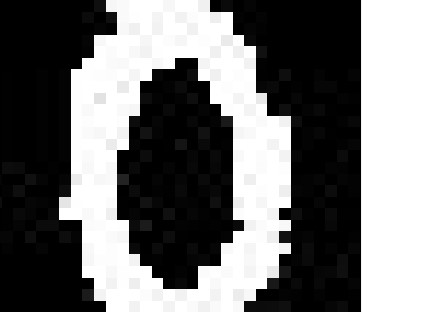

### 8. 预测所有图片

In [ ]:
def predict():
    #返回testDigits目录下的文件列表
    testFileList = listdir('test')
    #错误检测计数
    errorCount = 0.0
    #测试数据的数量
    mTest = len(testFileList)
    #从文件中解析出测试集的类别并进行 分类测试
    for i in range(mTest):
        #获得文件的名字
        fileNameStr = testFileList[i]
        #获得分类的数字
        classNumber = int(fileNameStr.split('_')[0])
        #获得测试集的1x1024向量,用于训练
        vectorUnderTest = img2vector('test/%s' % (fileNameStr))
        #获得预测结果
        classifierResult = KNN.predict(vectorUnderTest)
        if classifierResult == classNumber:
            res = '正确'
        else:
            res = '错误'
        print("分类返回结果为%d\t真实结果为%d\t预测%s" %(classifierResult, classNumber, res))
        if(classifierResult != classNumber):
            errorCount += 1.0
    print("总共错了%d个数据\n错误率为%f%%" % (errorCount, errorCount/mTest * 100))
#调用函数，预测所有图片
predict()

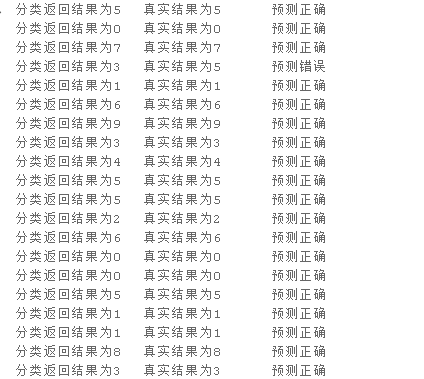